<h3 style="color:red;">Preterm neonate of 25+5 weeks of gestation and 0.826 kg with different sizes of the ductus arteriosus </h3>


 Model 'baseline neonate' loaded and initialized correctly.
 Ready in 6.5 sec. Average model step in 0.0273 ms.

 Model validation data:
 ----------------------
 Heart rate max : 110        bpm, min: 110        bpm.
 Bloodpressure  : 66/40 (49) mmHg
 LVO            : 179.5 ml/kg/min
 RVO            : 181.0 ml/kg/min
 SVC flow       : 78.2 ml/kg/min
 PDA flow       : 0.0 ml/kg/min
 LVO/RVO ratio  : 0.99

 Note the reversed E/A ratio in the extreme premature born baby.


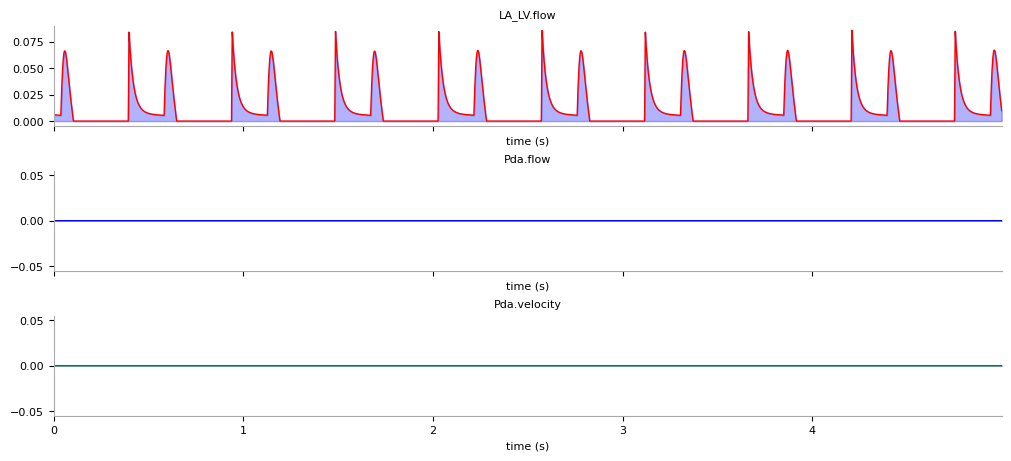

[{'time': 0.0,
  'Heart.ncc_atrial': 1015,
  'Heart.ncc_ventricular': 815,
  'LA_LV.flow': 0.005972177629716146,
  'Pda.flow': 0.0,
  'Pda.velocity': 0.0},
 {'time': 0.0005,
  'Heart.ncc_atrial': 1016,
  'Heart.ncc_ventricular': 816,
  'LA_LV.flow': 0.005963133891204475,
  'Pda.flow': 0.0,
  'Pda.velocity': 0.0},
 {'time': 0.001,
  'Heart.ncc_atrial': 1017,
  'Heart.ncc_ventricular': 817,
  'LA_LV.flow': 0.0059541820666788,
  'Pda.flow': 0.0,
  'Pda.velocity': 0.0},
 {'time': 0.0015,
  'Heart.ncc_atrial': 1018,
  'Heart.ncc_ventricular': 818,
  'LA_LV.flow': 0.005945319337682146,
  'Pda.flow': 0.0,
  'Pda.velocity': 0.0},
 {'time': 0.002,
  'Heart.ncc_atrial': 1019,
  'Heart.ncc_ventricular': 819,
  'LA_LV.flow': 0.005936546630028925,
  'Pda.flow': 0.0,
  'Pda.velocity': 0.0},
 {'time': 0.0025,
  'Heart.ncc_atrial': 1020,
  'Heart.ncc_ventricular': 820,
  'LA_LV.flow': 0.005927861201843196,
  'Pda.flow': 0.0,
  'Pda.velocity': 0.0},
 {'time': 0.003,
  'Heart.ncc_atrial': 1021,
  'Heart

In [1]:
# as this notebook is run from a subfolder, we need to change the working directory to the root folder
import os

if os.getcwd().split("/")[-1] != "explain-python":
    os.chdir("..")

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine

# instantiate a model engine instance with the 'baseline_neonate' model definition
# model = ModelEngine("definitions/baseline_neonate.json")
model = ModelEngine("definitions/baseline_neonate.json")

# report the gas pressures in kPa
model.set_pressure_unit("kpa")

# get a reference to all the submodels
models = model.models

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
from interfaces.NeoInterface import NeoInterface

neo = NeoInterface(model)

# enable or disable the physiological submodels which can be enabled or disabled.
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(False)

# enable or disable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.resuscitation(False)

# # stabilize the model by calculating 60 seconds
# neo.calculate(60)

# scale the model to a 25 week old baby
#neo.scale_patient_by_gestational_age("25wks_no_pda")

# stabilize the model by calculating 60 seconds
neo.calculate(120)

# get the vaildation data from the model
result = neo.validate_pda()

print(" Note the reversed E/A ratio in the extreme premature born baby.")

# plot the flow across the mitral valve and pda flow velocity
neo.plot_time_graph(
    ["LA_LV.flow", "Pda.flow", "Pda.velocity"],
    combined=False,
    sharey=False,
    time_to_calculate=5.0,
    analyze=False,
    sampleinterval=0.0005,
    fig_size_x=10,
    fig_size_y=2,
)

<h5>Open the ductus arteriosus in 10 seconds to a diameter of 3.0 mm creating a left-to-right shunt.</h5>

 Ready in 0.4 sec. Average model step in 0.2081 ms.

Opening the ductus arteriosus by increasing the diameter to 2.5 mm in 10 seconds


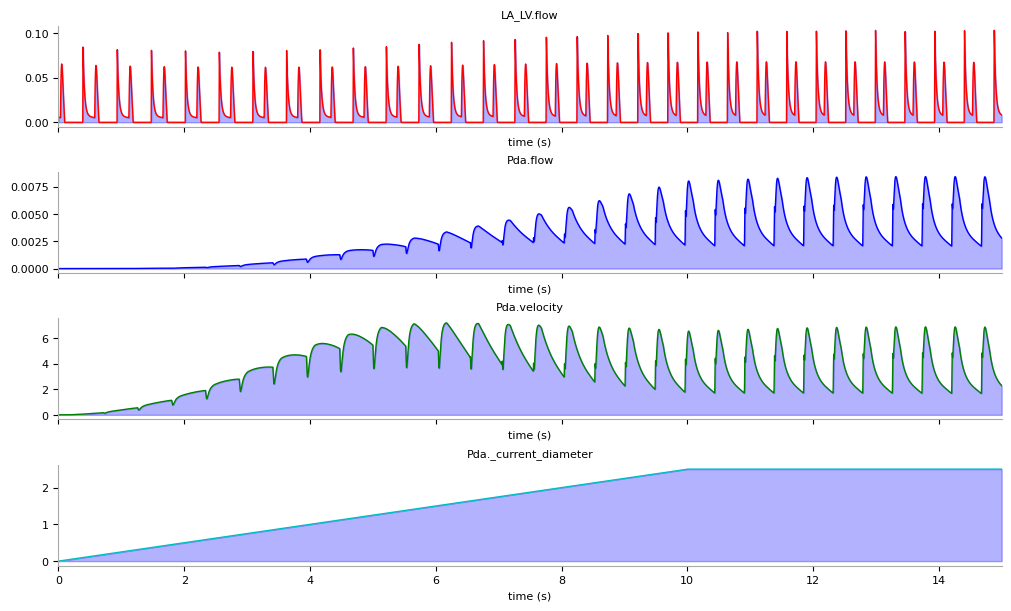

 Ready in 3.4 sec. Average model step in 0.0285 ms.

 Model validation data:
 ----------------------
 Heart rate max : 116        bpm, min: 115        bpm.
 Bloodpressure  : 67/35 (45) mmHg
 LVO            : 259.6 ml/kg/min
 RVO            : 171.7 ml/kg/min
 SVC flow       : 71.5 ml/kg/min
 PDA flow       : 98.2 ml/kg/min
 LVO/RVO ratio  : 1.51

 Ready in 0.1 sec. Average model step in 0.0553 ms.


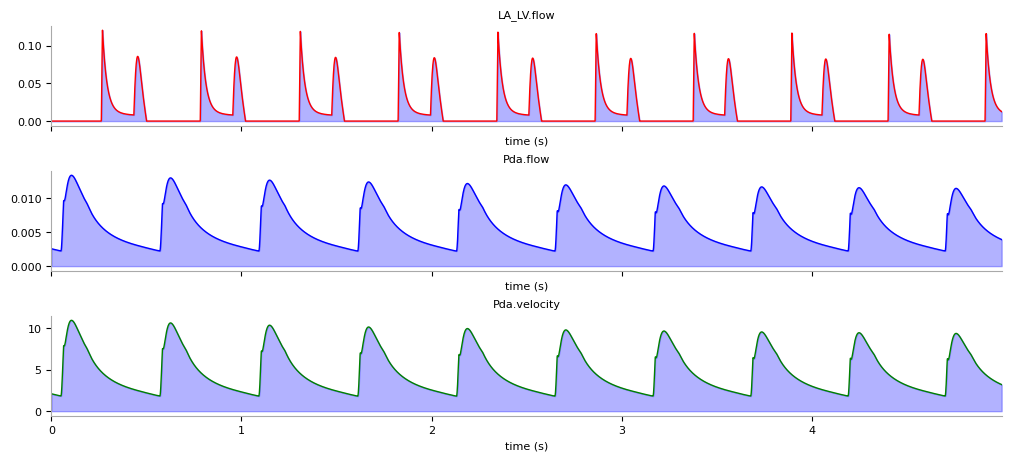

In [2]:
model.models["Breathing"].switch_breathing(False)
neo.fast_forward(1)

print("")
print(
    "Opening the ductus arteriosus by increasing the diameter to 2.5 mm in 10 seconds"
)
neo.open_ductus(new_diameter=2.5, in_time=10.0)

# stabilize the model by calculating 60 seconds and plot the flow velocity across the pda

neo.plot_time_graph(
    ["LA_LV.flow", "Pda.flow", "Pda.velocity", "Pda._current_diameter"],
    combined=False,
    sharey=False,
    time_to_calculate=15.0,
    analyze=False,
    sampleinterval=0.0005,
    fig_size_x=10,
    fig_size_y=2,
    fill=True,
)
model.models["Breathing"].switch_breathing(True)

# stabilize the model by calculating 60 seconds
neo.calculate(60)

# get the vaildation data from the model
result = neo.validate_pda()


# plot the flow across the mitral valve and pda flow velocity
model.models["Breathing"].switch_breathing(False)
neo.fast_forward(1)
neo.plot_time_graph(
    ["LA_LV.flow", "Pda.flow", "Pda.velocity"],
    combined=False,
    sharey=False,
    time_to_calculate=5.0,
    analyze=False,
    sampleinterval=0.0005,
    fig_size_x=10,
    fig_size_y=2,
)
model.models["Breathing"].switch_breathing(True)

In [3]:
neo.get_vitals()

{'heartrate': 117.14878933656455,
 'spo2_pre': 95.53773096653214,
 'spo2_post': 95.84644641680507,
 'abp_systole': 65.74951,
 'abp_diastole': 34.71818,
 'abp_mean': 45.06196,
 'pap_systole': 57.05683,
 'pap_diastole': 32.86514,
 'pap_mean': 40.92904,
 'cvp': 2.037344459,
 'resp_rate': 43.82733671649393,
 'pH': 7.3866669979710045,
 'po2': 10.334666198597882,
 'pco2': 5.842508330040947,
 'hco3': 26.0105757169101,
 'be': 0.45906884098589773}

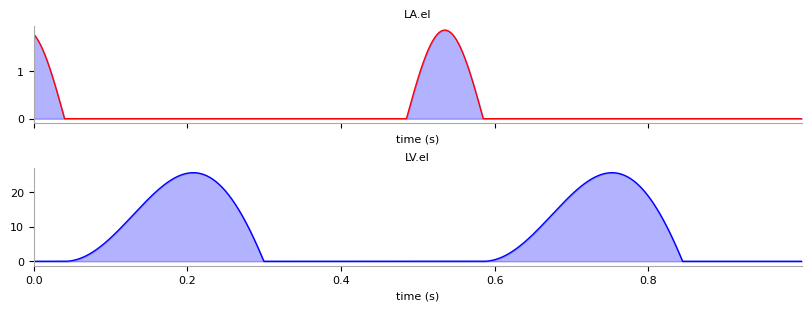

In [2]:
data = neo.plot_time_graph(["LA.el", "LV.el"], time_to_calculate=1.0, combined=False, sharey=False, analyze=False, sampleinterval=0.0005, fig_size_x=8, fig_size_y=2, fill=True)

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame(data)

In [5]:
df.to_excel('output.xlsx', index=False)